## AVOCADO PROJECT - 3

## Problem Statement :

Avocado is a fruit consumed by people heavily in the United States.

Content :

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data Set

In [4]:
df= pd.read_csv("C:/Users/hp/OneDrive/Desktop/avocado.csv")

In [5]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
df = df.iloc[: , 1:]
## Locking the column which didn't effect the dataset

In [7]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [9]:
## Checking the shape of Dataset
df.shape

(18249, 13)

In [10]:
## Checking the Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
##  We have total of 13 features here, No null value were present in any of the feature
# Date, type and region are  object type & categorical features
# while Remaining are float
# year is integer

In [12]:
## Describing the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [13]:
## From the above output We conclude that

# Multiple outliers were present in  XLarge Bags 

# Some of the  columns has large difference between mean and 50% , means data is right skewed and it have  outliers

# Because of differnece between 75 % and max values,We observe that many features have outliers

# Null Values

In [14]:
## Checking Null values 
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values were present from above output

<AxesSubplot:>

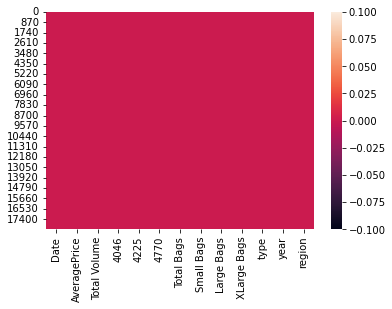

In [15]:
## Checking heatmap for null values
sns.heatmap(df.isnull())

In [16]:
##  No Null values present int he data

In [17]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [18]:
## checking the unique values of Date columns
df["Date"].nunique()

169

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

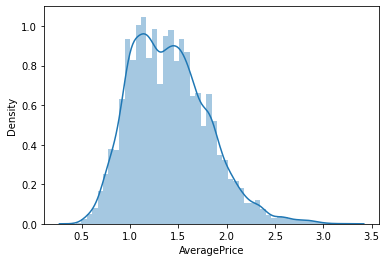

In [19]:
# Average Price
sns.distplot(df['AveragePrice'])

In [20]:
# Average price feature have right skewed data and, 2 bumps near mean

<AxesSubplot:xlabel='Total Volume', ylabel='year'>

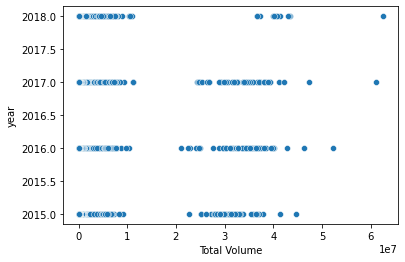

In [21]:
# Total Volume :   total number of avacado cold
sns.scatterplot('Total Volume','year',data=df)



In [22]:
# Year
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [23]:
# we have records of sales of Avacado in 2015-2018 year

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

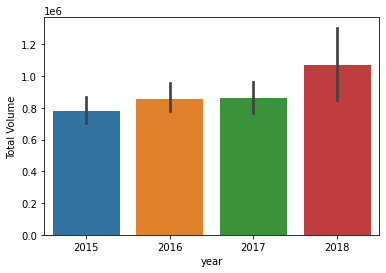

In [24]:
sns.barplot(y='Total Volume',x='year', data=df)

In [25]:
df.groupby('year')['Total Volume'].sum()

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [26]:
# Total avacado sales increases by year.


In [27]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [28]:
# Average price Exploration

In [29]:
df['AveragePrice'].nunique()

259

In [30]:
# we have 3 varity of avacade,  Product Lookup Code  PLU
# 4046 , 4225 , 4770


In [31]:
# Find Average price by type of avacado

df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

([<matplotlib.patches.Wedge at 0x19348b16700>,
 [Text(0.300862058141864, 1.0580557745084338, 'conventional'),
  Text(-0.30086215720419374, -1.0580557463396905, 'organic')],
 [Text(0.16410657716828944, 0.5771213315500547, '41.18%'),
  Text(-0.1641066312022875, -0.5771213161852856, '58.82%')])

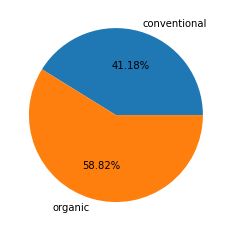

In [32]:
plt.pie( df.groupby('type')['AveragePrice'].mean().values, labels= df.groupby('type')['AveragePrice'].mean().index, autopct='%1.2f%%'  )

In [33]:
# Organic avacado have high average price than conventional

In [34]:
# Which type sold more, if price have any impact on sold

df.groupby('type')['Total Volume'].sum()


type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [35]:
# Conventional avacdo have more sale than organic

In [36]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

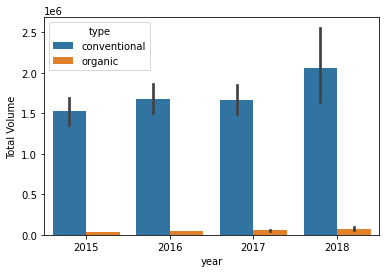

In [37]:
# Total sale by year by type
sns.barplot(y='Total Volume',x='year',hue='type', data=df)

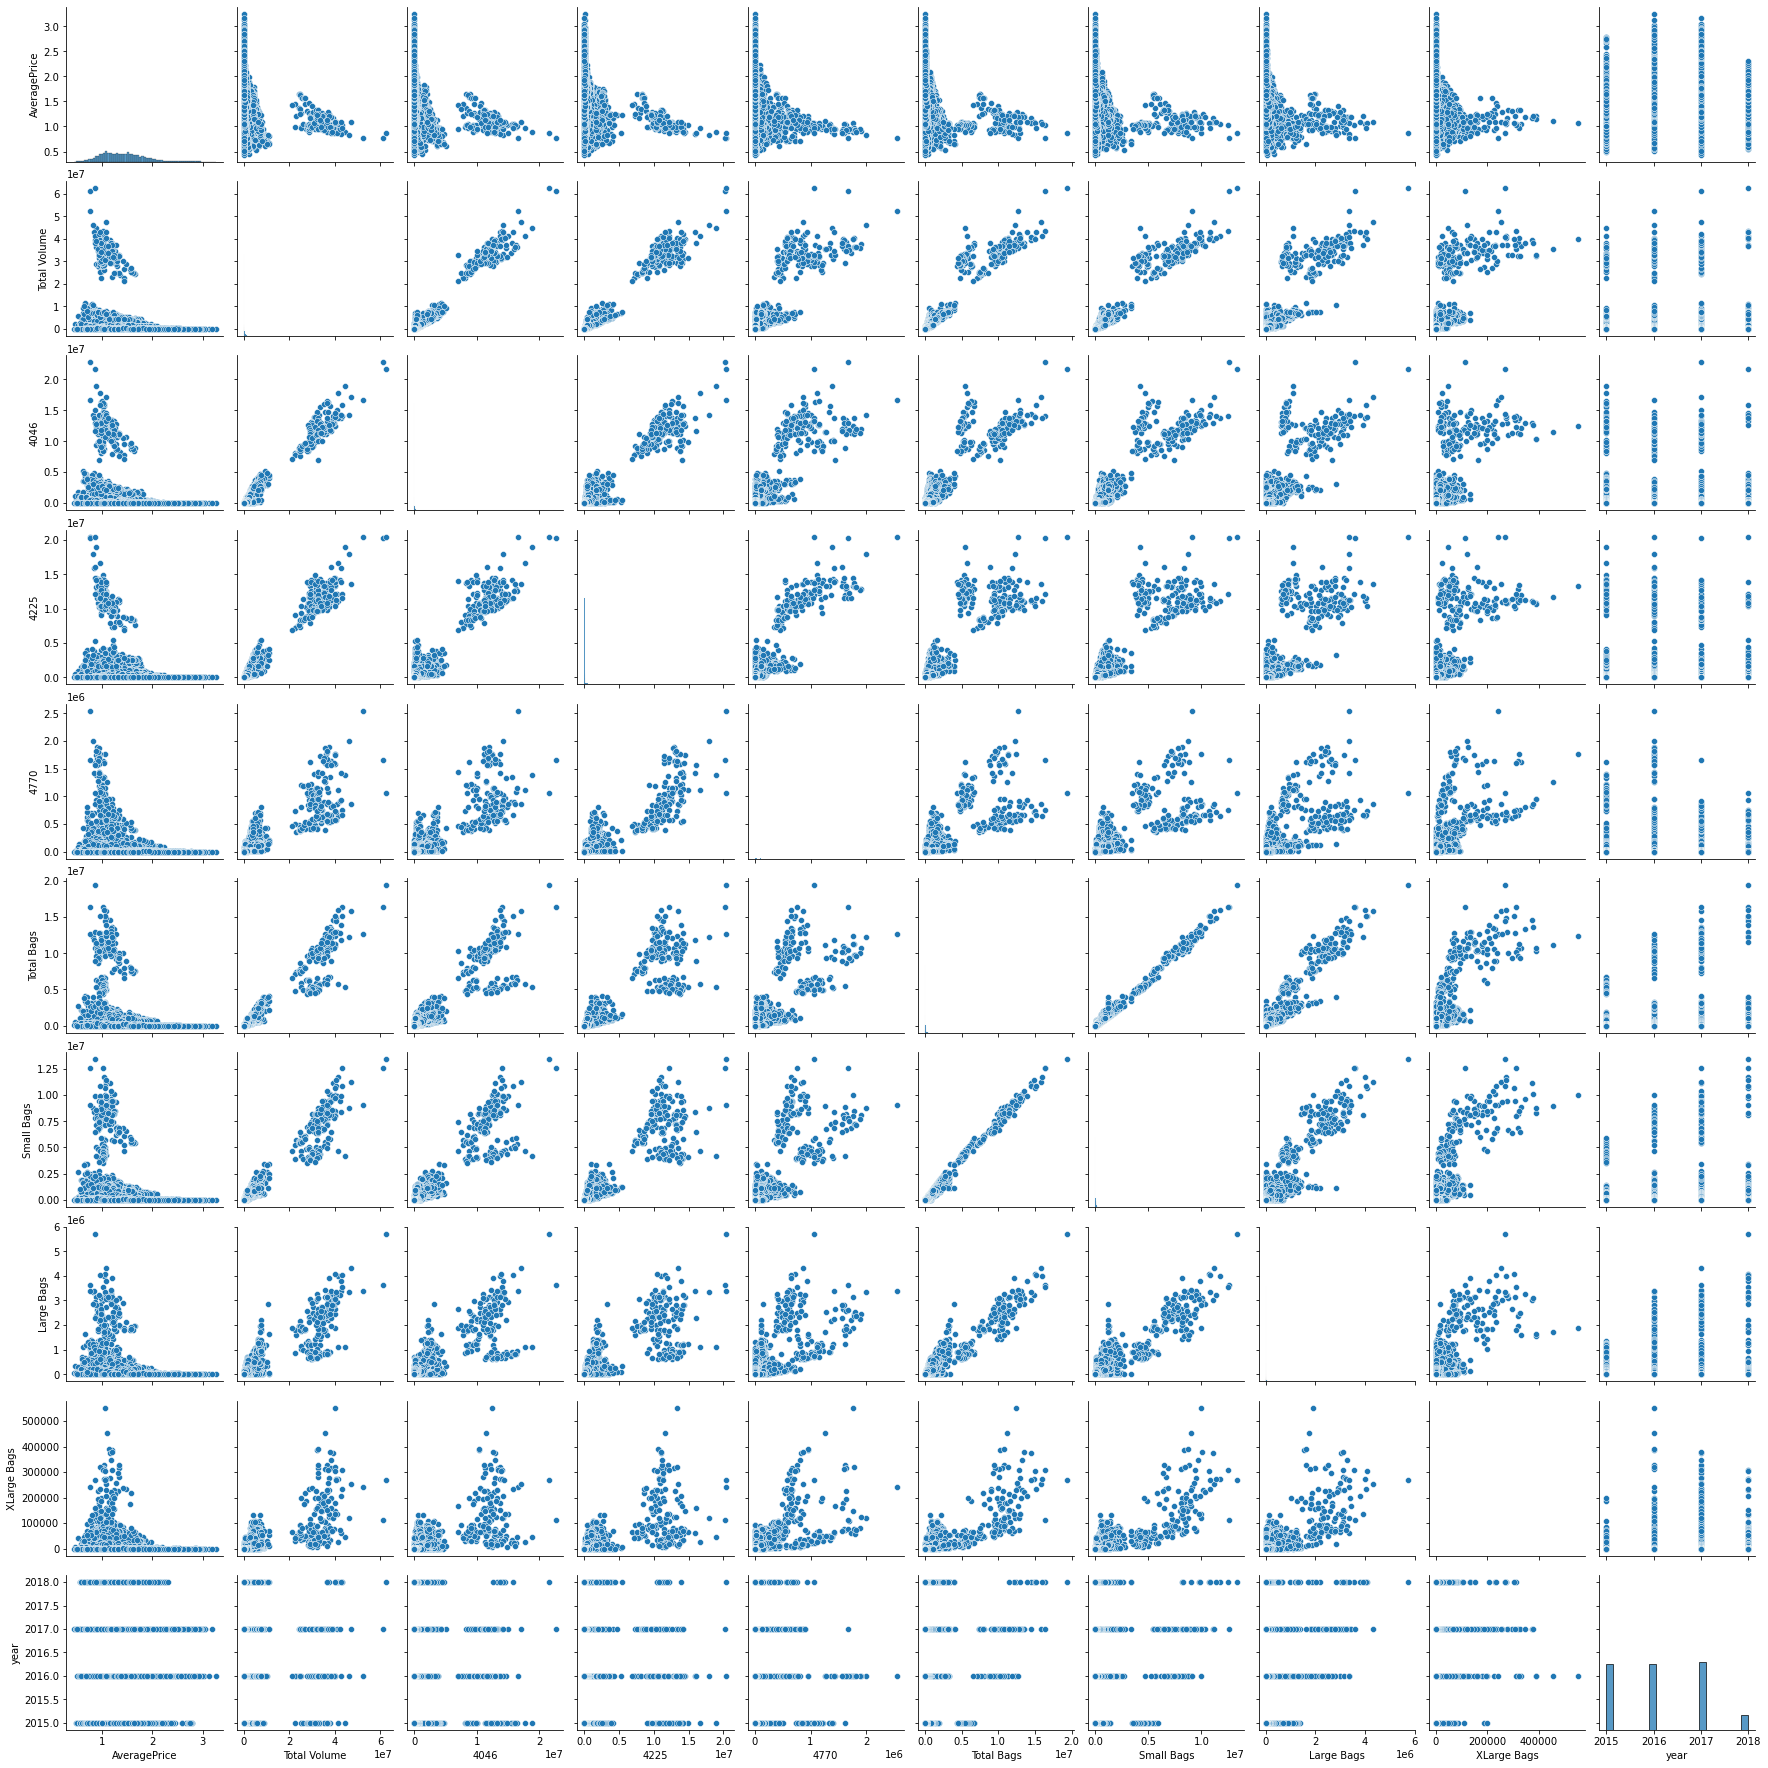

In [38]:
sns.pairplot(df)

In [39]:
# Sales of avacado increased by year

In [40]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [41]:
# Which type sold in which area

df['region'].nunique()



54

In [42]:
df.groupby(['region','type'])['AveragePrice'].mean().head(60)

region               type        
Albany               conventional    1.348757
                     organic         1.773314
Atlanta              conventional    1.068817
                     organic         1.607101
BaltimoreWashington  conventional    1.344201
                     organic         1.724260
Boise                conventional    1.076036
                     organic         1.620237
Boston               conventional    1.304379
                     organic         1.757396
BuffaloRochester     conventional    1.382308
                     organic         1.651361
California           conventional    1.105444
                     organic         1.685207
Charlotte            conventional    1.275089
                     organic         1.936982
Chicago              conventional    1.369349
                     organic         1.744201
CincinnatiDayton     conventional    1.015503
                     organic         1.402899
Columbus             conventional    1.066272


In [43]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [44]:
# find out the average price by year



<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

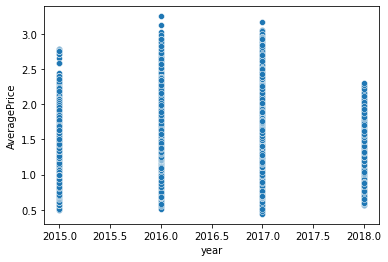

In [45]:
sns.scatterplot('year','AveragePrice', data=df)

In [46]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

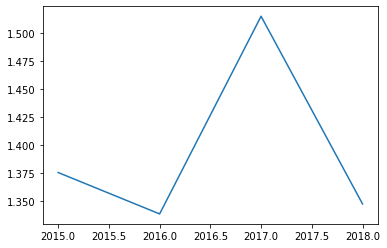

In [47]:
plt.plot(df.groupby('year')['AveragePrice'].mean().index, df.groupby('year')['AveragePrice'].mean().values  )

In [48]:
# Average price per year, seems average price was high during 2017, then 2015 is secound

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

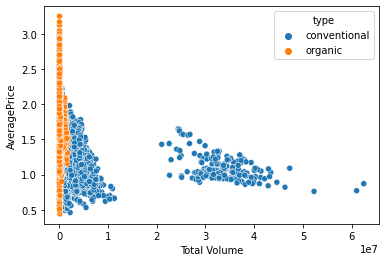

In [49]:
sns.scatterplot('Total Volume','AveragePrice',hue='type',data=df)

In [50]:
# Average price was always high for organic avacado,

In [51]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


([<matplotlib.axis.YTick at 0x193063f6d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

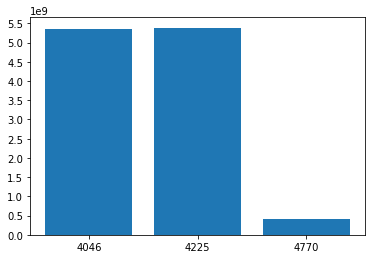

In [52]:
# Avacado category wise

plt.bar(  ['4046','4225','4770'],[df['4046'].sum(),df['4225'].sum(),df['4770'].sum()])
plt.yticks(range(1,6000000000,500000000))

In [53]:
df['4046'].sum()

5347110739.26

In [54]:
df['4225'].sum()

5386275717.93

In [55]:
df['4770'].sum()

416802342.12999994

In [56]:
# Type  4225  sold mostly, then 4046..  type 4770 is very less

In [57]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [58]:
# how much avacaddo sell per year

df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [59]:
# Both type of avacado is present in almost same amount each year

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

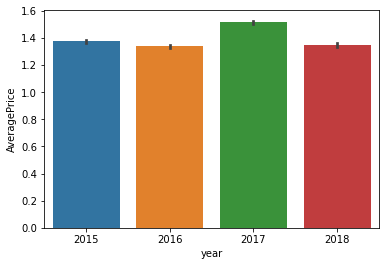

In [60]:
sns.barplot(x='year',y='AveragePrice',data=df)

In [61]:
# as we have seen above, average price was more in 2017

In [62]:
df['Date'] = pd.to_datetime(df['Date'])

In [63]:
df['Date'].dt.month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Date, Length: 18249, dtype: int64

In [64]:
df['Month']=df['Date'].dt.month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

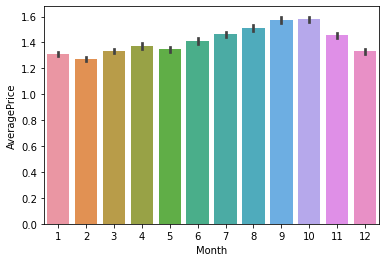

In [65]:
sns.barplot('Month','AveragePrice',data=df)

In [66]:
df.groupby('Month')['AveragePrice'].mean().sort_values()

Month
2     1.274387
1     1.311019
12    1.331112
3     1.332255
5     1.346601
4     1.374380
6     1.408964
11    1.455563
7     1.462077
8     1.512514
9     1.572654
10    1.579683
Name: AveragePrice, dtype: float64

In [67]:
# average price was high in July, august,sept,October months

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

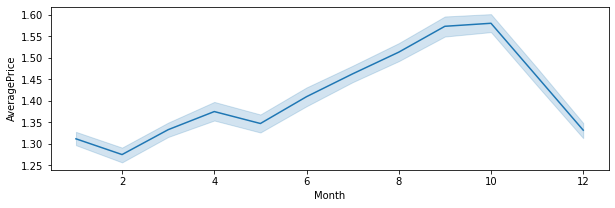

In [68]:
plt.figure(figsize=(10,3))
sns.lineplot('Month','AveragePrice',data=df)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

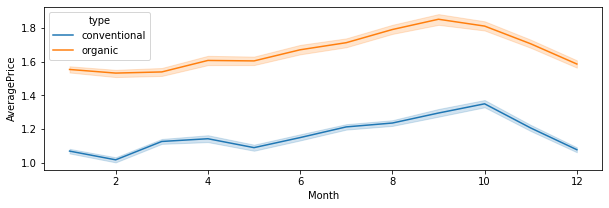

In [69]:
plt.figure(figsize=(10,3))
sns.lineplot('Month','AveragePrice',hue='type',data=df)

In [70]:
# Conclusion:  Price hike for both type of avacado during 8,9,10 months

In [71]:
# Jan-FEB-March  is the season for avacado, so price is comapritvely low
# in DEC, every one wants to clear stock for nre production , so price came down

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

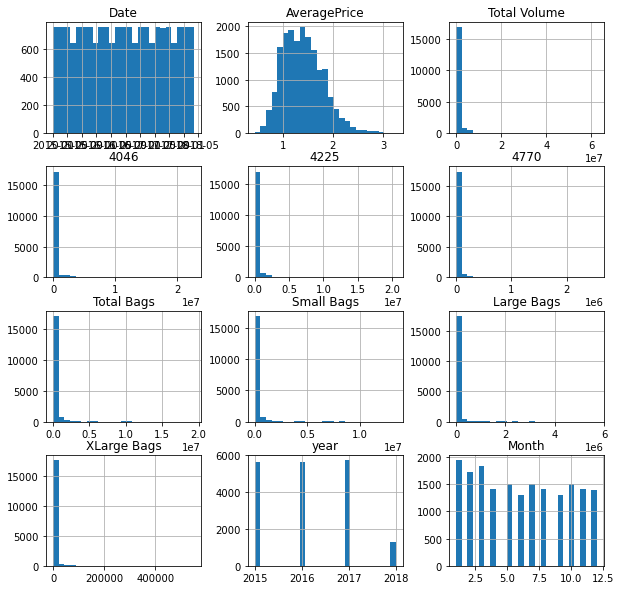

In [72]:
df.hist(figsize=(10,10), bins=25)

## AveragePrice is almost normally distributed
# other columns are right skewed

In [73]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [74]:
# Total Bage are the sum of Small Bags + Large Bags + XLarge Bags

In [75]:
df['Total Bags'].sum()

4373175798.389999

In [76]:
df['Small Bags'].sum() + df['Large Bags'].sum() +df['XLarge Bags'].sum()

4373175785.39

In [77]:
# we dnt need total bags column here, because it is captured by  other bags categtory

# correlation

In [78]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


In [79]:
correlation= list(df.columns)

In [80]:
correlation.pop(1)

'AveragePrice'

In [81]:
correlation.insert(14,'AveragePrice')

In [82]:
corr=df[correlation]

<AxesSubplot:>

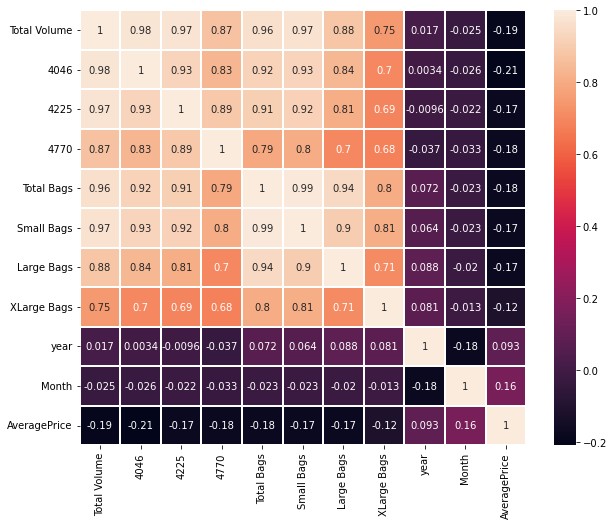

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(corr.corr(), annot=True, linecolor='white',linewidths=.25)

# Target variable is Average Price

In [84]:
# correlation:  almost all features are negatively low correlated, 
# while year and month are positively low correlated

In [85]:
# much more independent features are highly correlated to each other, lets fine VIF

In [86]:
# Year is very low correlated with average price

# VIF to find multi colinearity

In [87]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [88]:
d=df.drop(['Date','type','region','AveragePrice','Total Bags','year'], axis=1)

In [89]:
d

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Month
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,12
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,12
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,12
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,12
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,11
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,2
18245,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1
18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1
18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1


<AxesSubplot:>

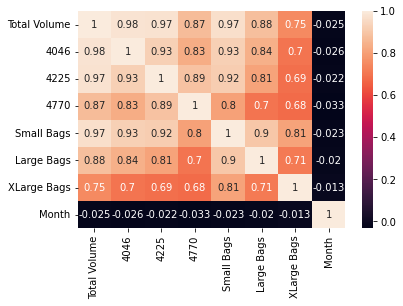

In [90]:
sns.heatmap(d.corr(),annot=True)

In [91]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(d)

In [92]:
scaled

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -0.22235202,
        -0.17557961,  1.64763162],
       [-0.23042664, -0.23110251, -0.20805446, ..., -0.22233464,
        -0.17557961,  1.64763162],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -0.22231148,
        -0.17557961,  1.64763162],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ..., -0.22256082,
        -0.17557961, -1.46495942],
       [-0.24162464, -0.2304279 , -0.24265143, ..., -0.2225293 ,
        -0.17557961, -1.46495942],
       [-0.24125273, -0.22934712, -0.24317042, ..., -0.22262764,
        -0.17557961, -1.46495942]])

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [94]:
VIF= pd.DataFrame()
VIF['features']= d.columns

In [95]:
VIF['vif']= [variance_inflation_factor(d.values,i) for i in range(len(d.columns))]

In [96]:
VIF

,features,vif
0,Total Volume,5.202516e+09
1,4046,6.933785e+08
2,4225,6.320930e+08
3,4770,4.963920e+06
4,Small Bags,2.426346e+08
5,Large Bags,2.569115e+07
6,XLarge Bags,1.326561e+05
7,Month,1.044053e+00


In [97]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [98]:
# However some independent are highly correlated to each other but we cant drop those features because they provide different kind of information to predict average price

In [99]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

# outliers

In [100]:
num= df.select_dtypes(np.number)

In [101]:
num.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

In [102]:
# data is skewed

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

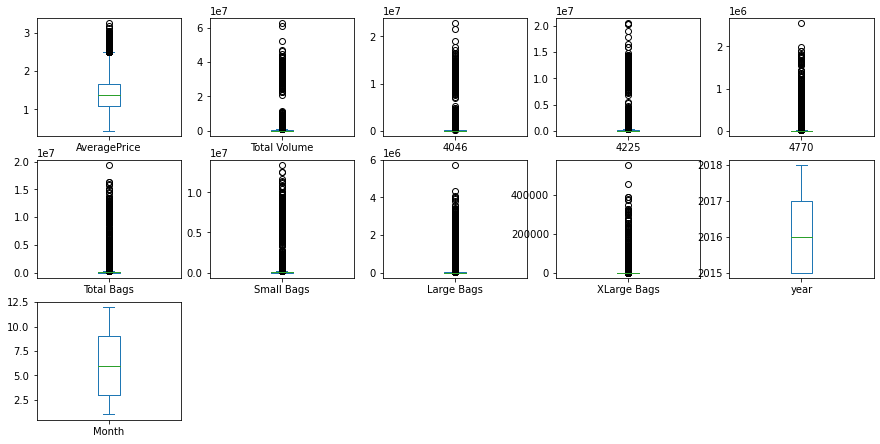

In [103]:
df.plot(kind='box', subplots=True, layout=(4,5),figsize=(15,10))

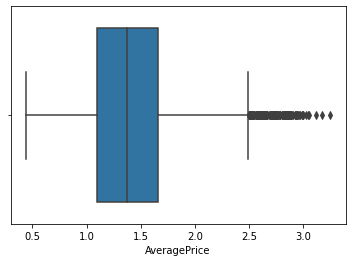

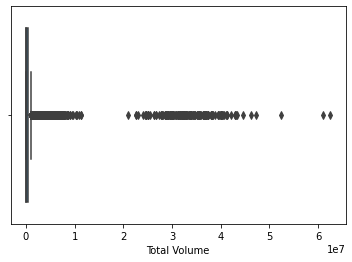

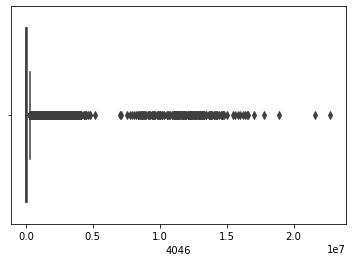

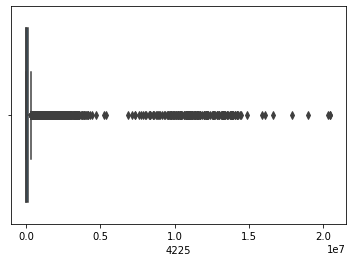

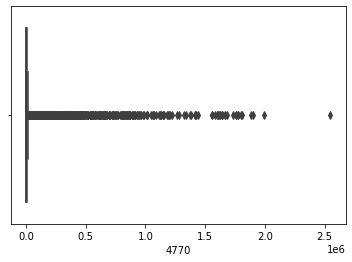

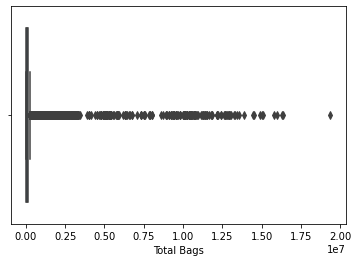

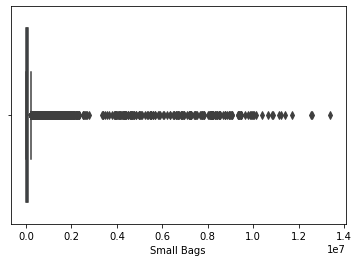

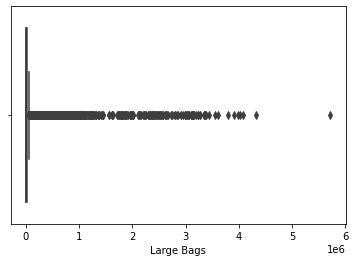

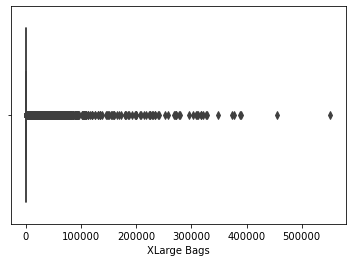

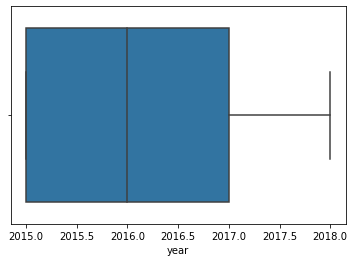

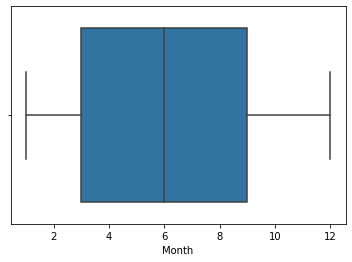

In [104]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [105]:
# All columns have outliers except, year and month

In [106]:
#lets handle

In [107]:
from scipy.stats import zscore

# calculate z score
z=np.abs(zscore(num))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      yea

In [108]:
threshold=3
print(np.where(z<3))
print(num.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 11)


In [109]:
# assign the value to df_new which are less the threshold
data= df[(z<3).all(axis=1)]

In [110]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [111]:
data.shape

(17651, 14)

In [112]:
# Decide to remove ooutliers here.
df.shape[0]-data.shape[0]

598

In [113]:
# 467 records have been deleted as outliers

In [114]:
num_new=data.drop(['AveragePrice','Date','type','region'], axis=1)

In [115]:
num_new.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

In [116]:
num_new.head(2)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12


In [117]:
num_new.shape

(17651, 10)

In [118]:
Y=data['AveragePrice']

In [119]:
Y.shape

(17651,)

# Transformation to remove skewness

In [120]:
from sklearn.preprocessing import power_transform
transformed=power_transform(num_new)

In [121]:
transformed=pd.DataFrame(transformed)
transformed.columns=num_new.columns

In [122]:
transformed.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Month          -0.146554
dtype: float64

In [123]:
# It has reduced skewness very well


In [124]:
transformed.head(3)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647,1.491383
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647,1.491383
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647,1.491383


In [125]:
transformed.shape

(17651, 10)

# PCA to handle Dimentionality Reduction

In [126]:
#pcs_data=df.select_dtypes(np.number)

In [127]:
#pcs_data.shape

In [128]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(transformed)

In [129]:
from sklearn.decomposition import PCA
pca= PCA()

In [130]:
principal_component=pca.fit_transform(scaled)

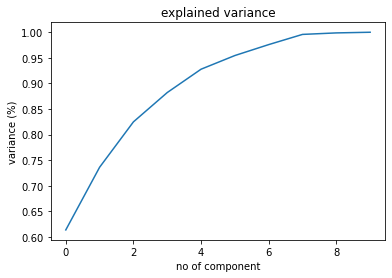

In [131]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

In [132]:
# Graph shows 7 components has explained 97% variance of all features, so use 7

In [133]:
pca=PCA(n_components=7)

In [134]:
new_data= pca.fit_transform(scaled)
principal_x= pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])


In [135]:
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.054280,-1.926906,-0.316834,-0.143358,0.500275,0.465078,-0.267559
1,-1.107373,-1.906494,-0.344648,-0.129888,0.486420,0.545947,-0.334382
2,-0.789543,-1.996824,-0.231603,-0.139444,0.529697,0.754814,-0.207641
3,-1.033615,-1.969558,-0.263836,-0.167128,0.374129,0.570255,-0.093852
4,-1.156035,-1.794040,-0.153531,-0.183083,0.252861,0.546405,-0.135038
...,...,...,...,...,...,...,...
17646,-1.600427,2.467002,-0.281279,-0.174348,0.535261,-0.404351,0.036870
17647,-1.741173,2.686826,0.090849,-0.080746,0.448342,-0.203622,0.015879
17648,-1.328701,2.398892,0.403804,0.490844,0.775516,0.781441,0.848922
17649,-1.191110,2.395605,0.409735,0.450230,0.811754,0.743474,0.831159


# Encoding of categoricl data

In [136]:
# we will drop Date column, because we have already extracted year and month from it.

#df.select_dtypes('O')  #  these are nominal categorical features

In [137]:
df['region'].nunique()

54

In [138]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# Binary Encoding

In [139]:
cat= data[['type','region']]

In [140]:
cat

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


In [141]:
# remove rows having outliers for numerical columns

In [142]:
!pip install category_encoders

In [143]:
import category_encoders as ce

In [144]:
encoder= ce.BinaryEncoder(cols=['type','region'],return_df=True)

In [145]:
# Fit and Trabsform data

data_encoded= encoder.fit_transform(cat)

In [146]:
data_encoded

,type_0,type_1,region_0,region_1,region_2,region_3,region_4,region_5
0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
18244,1,0,1,1,0,1,0,1
18245,1,0,1,1,0,1,0,1
18246,1,0,1,1,0,1,0,1
18247,1,0,1,1,0,1,0,1


# BaseN Encoding

In [147]:
encoder_N= ce.BaseNEncoder(cols=['type','region'],return_df=True,base=5)

In [148]:
data_encoded_basen= encoder_N.fit_transform(cat)

In [149]:
data_encoded_basen

,type_0,region_0,region_1,region_2
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
18244,2,2,0,3
18245,2,2,0,3
18246,2,2,0,3
18247,2,2,0,3


In [150]:
# Binary encoding have 8 columns while BaseN have 4 columns

#Lets proceed with BaseN encoder as of now

In [151]:
# Standardize categorical data as well

sc= StandardScaler()
scaled_cat=sc.fit_transform(data_encoded_basen)

In [152]:

scaled_cat= pd.DataFrame(scaled_cat)
scaled_cat.columns= data_encoded_basen.columns

In [153]:
scaled_cat

,type_0,region_0,region_1,region_2
0,-1.019047,-1.002296,-1.284392,-0.727015
1,-1.019047,-1.002296,-1.284392,-0.727015
2,-1.019047,-1.002296,-1.284392,-0.727015
3,-1.019047,-1.002296,-1.284392,-0.727015
4,-1.019047,-1.002296,-1.284392,-0.727015
...,...,...,...,...
17646,0.981309,2.179062,-1.284392,0.698348
17647,0.981309,2.179062,-1.284392,0.698348
17648,0.981309,2.179062,-1.284392,0.698348
17649,0.981309,2.179062,-1.284392,0.698348


In [154]:
principal_x.shape  , scaled_cat.shape

((17651, 7), (17651, 4))

In [155]:
data_encoded.shape

(17651, 8)

In [156]:
X=pd.concat([principal_x,scaled_cat],axis=1,join='inner')

In [157]:
X1=pd.concat([principal_x,data_encoded],axis=1,join='inner')

In [158]:
principal_x.shape  , data_encoded.shape

((17651, 7), (17651, 8))

In [159]:
X.shape

(17651, 11)

In [160]:
X1.shape

(17053, 15)

In [161]:
#pd.concat([principal_x,data_encoded],axis=1)

In [162]:
X1.shape

(17053, 15)

In [163]:
Y= df['AveragePrice']

In [164]:
# remove records with outlier

Y= Y[(z<3).all(axis=1)]

In [165]:
X.shape , Y.shape

((17651, 11), (17651,))

# Machine Learning

In [166]:
# Its a Regression problem coz output variable have continuous data, Average Price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [167]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.3)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  1 The model performance very well
At random state:  1
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  4 The model performance very well
At random state:  4
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  15 The model performance very well
At random state:  15
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  17 The model performance very well
At random state:  17
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  18 The model performance very well
At random state:  18
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  26 The model performance very well
At random state:  26
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXX

In [168]:
# Lets select random state= 125

In [169]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=125,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [172]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 0.21393903791687252
mean_square_error of LinearRegression() model 0.07519445893780433
R2 Score of LinearRegression() model 49.42386785152617
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 0.21393865551417365
mean_square_error of Ridge() model 0.07519457015735875
R2 Score of Ridge() model 49.42379304475235
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 0.3159582710561173
mean_square_error of Lasso() model 0.14919917628737633
R2 Score of Lasso() model -0.3520387399190028
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 0.1410337015009912
mean_square_error of DecisionTreeRegressor() model 0.04459459076748796
R2 Score of DecisionTreeRegressor() model 70.00547716382783
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 0.12947490874957784
mean_square_error o

# CROSS Validation

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  LinearRegression() model 0.07519445893780433
cross Validation score of  LinearRegression()  is  -0.08029091694103635
**************************************************
mean_square of  Ridge() model 0.07519457015735875
cross Validation score of  Ridge()  is  -0.08028992273078475
**************************************************
mean_square of  Lasso() model 0.14919917628737633
cross Validation score of  Lasso()  is  -0.16258283136561785
**************************************************
mean_square of  DecisionTreeRegressor() model 0.04459459076748796
cross Validation score of  DecisionTreeRegressor()  is  -0.10686111296475125
**************************************************
mean_square of  SVR() model 0.030476607219535837
cross Validation score of  SVR()  is  -0.0676015641638894
**************************************************
mean_square of  KNeighborsRegressor() model 0.01873102917020674
cross Validation score of  KNeighborsRegressor()  is  -0.09096348918078018
*

In [175]:
# For a generalised model, SGD has minimum gap

# mean_square of  SGDRegressor() model 0.08239329509185805
# cross Validation score of  SGDRegressor()  is  -0.08771725502019286

# SGD Regressor()

In [176]:
y_test,i.predict(x_test)

(14358    1.53
 7062     1.62
 7518     0.76
 12627    1.40
 6274     1.19
          ... 
 8854     1.30
 2808     1.52
 10174    1.82
 6827     0.79
 15423    1.44
 Name: AveragePrice, Length: 3531, dtype: float64,
 array([1.5725088 , 1.42944077, 0.92511195, ..., 1.91943677, 0.9564193 ,
        1.26940337]))

Text(0, 0.5, 'Predicted Y')

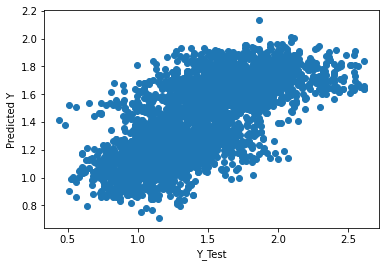

In [177]:
plt.scatter(x=y_test,y=SGH_model.predict(x_test))
plt.xlabel('Y_Test')
plt.ylabel('Predicted Y')

# Hypertune

In [178]:
10.0 ** -np.arange(1, 7)

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])

In [179]:
params={'penalty':['l2','l1','elasticnet'],
       'alpha':[1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06],
        'loss':['squared_loss', 'huber', 'epsilon_insensitive'],
       'learning_rate':['constant','optimal','invscaling']}

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
GCV= GridSearchCV(SGH_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [182]:
GCV.best_params_

{'alpha': 1e-05,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'penalty': 'l1'}

In [183]:
GCV_pred= GCV.best_estimator_.predict(x_test)
mean_squared_error(y_test,GCV_pred)

0.07536983756538308

# SGD regressor is doing good

# MSE= 8

# Prediction with Region

In [184]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [185]:
df['region'].nunique()

54

In [186]:
# We have already done EDA, lets process the data

In [187]:
# delete Date feature becauyse we have yera and month already

In [188]:
# Label encoder for target variable df['region'] to convert into integer

In [189]:
# Type feature can be hot encoded

In [190]:
# as did earlier, we will use PCA for all dependent fetaures to reduce multi colinearity

# Outlier()

In [191]:
# if outlier records are lewss, we will delete

In [192]:
num= df.select_dtypes(np.number)

In [193]:
num

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [194]:
num.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

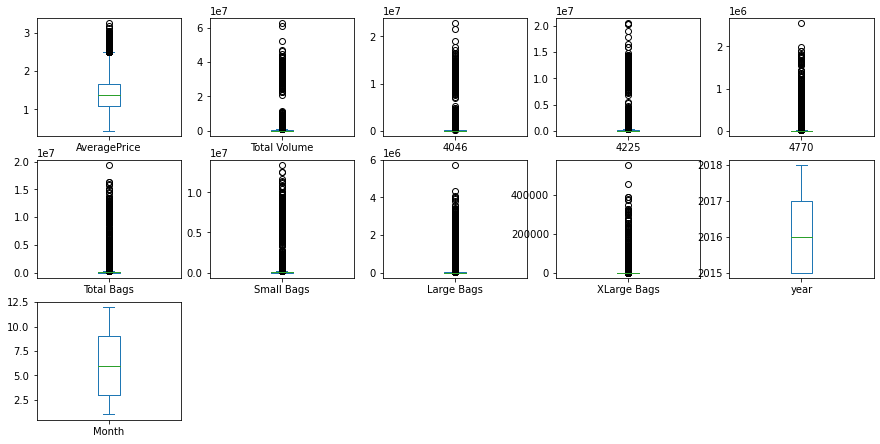

In [195]:
df.plot(kind='box', subplots=True, layout=(4,5),figsize=(15,10))

In [196]:
from scipy.stats import zscore

# calculate z score
z=np.abs(zscore(num))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      yea

In [197]:
threshold=3
print(np.where(z<3))
print(num.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 11)


In [198]:
# assign the value to df_new which are less the threshold
data= df[(z<3).all(axis=1)]

In [199]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [200]:
data.shape

(17651, 14)

In [201]:
df.shape[0]- data.shape[0]

598

In [202]:
data.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

In [203]:
# Skewness reduced to some extent

In [204]:
data.drop('Date', axis=1,inplace=True)

In [205]:
data.shape

(17651, 13)

In [206]:
num= data.select_dtypes(np.number)

In [207]:
num

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


# Transformation to remove skewness

In [208]:
from sklearn.preprocessing import power_transform
transformed=power_transform(num)

In [209]:
transformed=pd.DataFrame(transformed)
transformed.columns= num.columns

In [210]:
transformed

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647,1.491383
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647,1.491383
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647,1.491383
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210647,1.491383
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210647,1.276081
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978707,-1.218907
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978707,-1.640288
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978707,-1.640288
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978707,-1.640288


In [211]:
transformed.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Month          -0.146554
dtype: float64

# PCA  - to reduce curse of dimentionality

In [212]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(transformed)

In [213]:
scaled= pd.DataFrame(scaled)
scaled.columns= transformed.columns

In [214]:
scaled

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618,1.491383
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618,1.491383
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618,1.491383
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618,1.491383
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618,1.276081
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735,-1.218907
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735,-1.640288
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735,-1.640288
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735,-1.640288


In [215]:
from sklearn.decomposition import PCA
pca= PCA()

In [216]:
principal_component=pca.fit_transform(scaled)

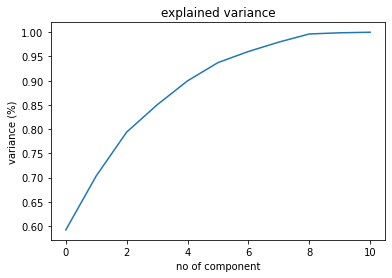

In [217]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

In [218]:
## Graph shows 8 components has explained 98% variance of all features, so use 8

In [219]:
pca=PCA(n_components=8)

In [220]:
new_data= pca.fit_transform(scaled)
principal_x= pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])


In [221]:
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.994502,-1.929399,-0.276088,0.133245,0.204543,0.430444,0.446160,-0.293472
1,-1.059514,-1.905803,-0.315367,0.121114,0.196365,0.409416,0.549327,-0.344990
2,-0.441093,-2.069556,0.292058,0.648459,-0.173762,0.805004,0.881128,-0.219814
3,-0.794921,-2.018146,0.098551,0.523641,-0.077650,0.548295,0.617677,-0.119290
4,-1.056632,-1.815102,-0.030327,0.253157,0.109897,0.242019,0.533207,-0.150144
...,...,...,...,...,...,...,...,...
17646,-1.716615,2.482323,-0.186278,0.054436,0.290105,0.501152,-0.365258,0.024637
17647,-1.898280,2.699041,0.059134,-0.254415,0.372980,0.244940,-0.289920,-0.022690
17648,-1.589879,2.438074,0.005578,-1.165531,0.399509,0.231771,0.709121,0.907766
17649,-1.489177,2.445188,-0.067742,-1.241067,0.510939,0.196425,0.639415,0.882804


In [222]:
cat=pd.get_dummies(data['type'])

In [223]:
principal_x.shape , cat.shape

((17651, 8), (17651, 2))

In [224]:
pd.concat([principal_x,cat],axis=1,join='inner')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,conventional,organic
0,-0.994502,-1.929399,-0.276088,0.133245,0.204543,0.430444,0.446160,-0.293472,1,0
1,-1.059514,-1.905803,-0.315367,0.121114,0.196365,0.409416,0.549327,-0.344990,1,0
2,-0.441093,-2.069556,0.292058,0.648459,-0.173762,0.805004,0.881128,-0.219814,1,0
3,-0.794921,-2.018146,0.098551,0.523641,-0.077650,0.548295,0.617677,-0.119290,1,0
4,-1.056632,-1.815102,-0.030327,0.253157,0.109897,0.242019,0.533207,-0.150144,1,0
...,...,...,...,...,...,...,...,...,...,...
17646,-1.716615,2.482323,-0.186278,0.054436,0.290105,0.501152,-0.365258,0.024637,0,1
17647,-1.898280,2.699041,0.059134,-0.254415,0.372980,0.244940,-0.289920,-0.022690,0,1
17648,-1.589879,2.438074,0.005578,-1.165531,0.399509,0.231771,0.709121,0.907766,0,1
17649,-1.489177,2.445188,-0.067742,-1.241067,0.510939,0.196425,0.639415,0.882804,0,1


In [225]:
principal_x['type']= data['type']

In [226]:
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,type
0,-0.994502,-1.929399,-0.276088,0.133245,0.204543,0.430444,0.446160,-0.293472,conventional
1,-1.059514,-1.905803,-0.315367,0.121114,0.196365,0.409416,0.549327,-0.344990,conventional
2,-0.441093,-2.069556,0.292058,0.648459,-0.173762,0.805004,0.881128,-0.219814,conventional
3,-0.794921,-2.018146,0.098551,0.523641,-0.077650,0.548295,0.617677,-0.119290,conventional
4,-1.056632,-1.815102,-0.030327,0.253157,0.109897,0.242019,0.533207,-0.150144,conventional
...,...,...,...,...,...,...,...,...,...
17646,-1.716615,2.482323,-0.186278,0.054436,0.290105,0.501152,-0.365258,0.024637,organic
17647,-1.898280,2.699041,0.059134,-0.254415,0.372980,0.244940,-0.289920,-0.022690,organic
17648,-1.589879,2.438074,0.005578,-1.165531,0.399509,0.231771,0.709121,0.907766,organic
17649,-1.489177,2.445188,-0.067742,-1.241067,0.510939,0.196425,0.639415,0.882804,organic


In [227]:
X=pd.get_dummies(principal_x)

In [228]:
X.shape

(17651, 10)

In [229]:
# Label encoder for target variable

In [230]:
from sklearn.preprocessing import LabelEncoder

In [231]:
le=LabelEncoder()
Y=le.fit_transform(data['region'])

In [232]:
Y.shape

(17651,)

In [233]:
pd.DataFrame(Y,columns=['region']).value_counts()

region
0         338
16        338
49        338
44        338
39        338
38        338
35        338
34        338
32        338
30        338
26        338
23        338
19        338
18        338
27        338
10        338
2         338
8         338
9         338
5         338
11        338
4         338
12        338
13        338
20        337
1         337
28        337
50        336
33        336
14        336
41        336
40        336
24        335
31        335
21        333
25        333
48        333
7         332
53        332
22        331
17        331
36        330
3         329
37        328
47        328
43        326
29        325
46        307
42        301
45        292
6         290
15        272
52        256
51        169
dtype: int64

# Machine Learning

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [235]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    
    

Best accuracy is  0.3990370999716794 on Random State = 92


# 2nd Method

In [236]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  object 
 10  year          17651 non-null  int64  
 11  region        17651 non-null  object 
 12  Month         17651 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 2.4+ MB


<AxesSubplot:>

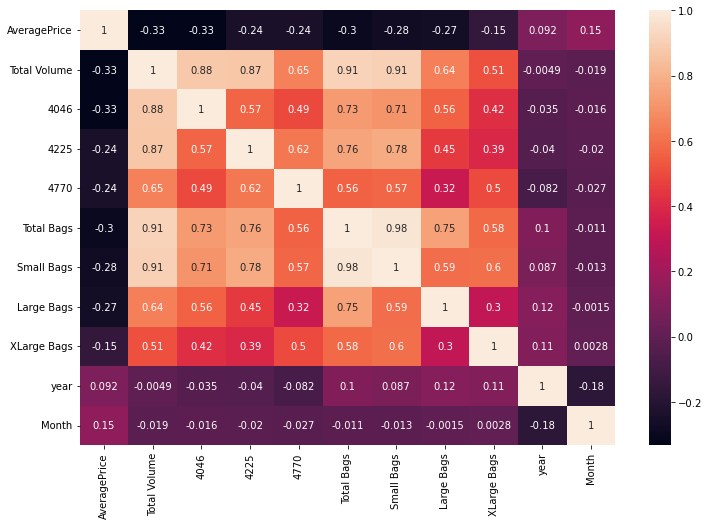

In [238]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [239]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [240]:
scaled

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618,1.491383
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618,1.491383
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618,1.491383
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618,1.491383
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618,1.276081
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735,-1.218907
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735,-1.640288
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735,-1.640288
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735,-1.640288


In [241]:
scaled['type']= data['type']

In [242]:
scaled

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,type
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618,1.491383,conventional
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618,1.491383,conventional
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618,1.491383,conventional
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618,1.491383,conventional
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618,1.276081,conventional
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735,-1.218907,organic
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735,-1.640288,organic
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735,-1.640288,organic
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735,-1.640288,organic


In [243]:
input_data=pd.get_dummies(scaled)

In [244]:
input_data.shape

(17651, 13)

In [245]:
Y.shape

(17651,)

In [246]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(input_data,Y,random_state=i,test_size=.33)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    
    

Best accuracy is  0.5004291845493563 on Random State = 92


# 3rd Method

In [247]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [248]:
# we can remove these columns, not required

final_data= data.drop(['Total Volume','Total Bags'], axis=1)

<AxesSubplot:>

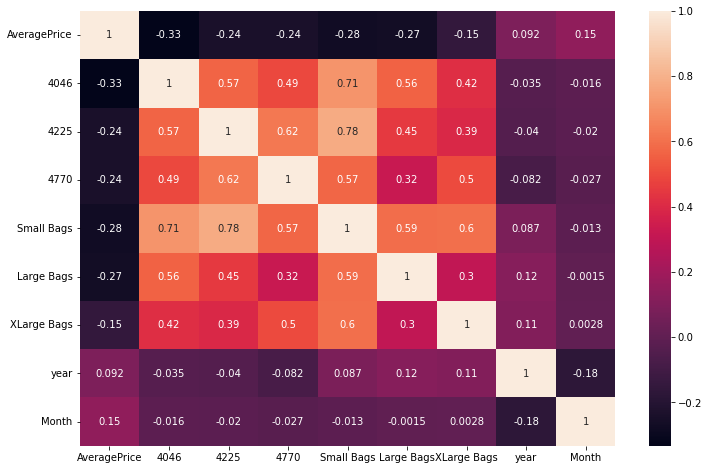

In [249]:
plt.figure(figsize=(12,8))
sns.heatmap(final_data.corr(), annot=True)

In [250]:
final_data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11


In [251]:
final_data.shape

(17651, 11)

In [252]:
final_data.skew()

AveragePrice    0.377432
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

In [253]:
final_data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11


In [254]:
final_data['region'].value_counts()

Albany                 338
HarrisburgScranton     338
Syracuse               338
SouthCarolina          338
Roanoke                338
RichmondNorfolk        338
Plains                 338
Pittsburgh             338
Philadelphia           338
NorthernNewEngland     338
Nashville              338
Louisville             338
Indianapolis           338
Houston                338
NewOrleansMobile       338
Chicago                338
BaltimoreWashington    338
Detroit                338
Denver                 338
DallasFtWorth          338
Boston                 338
BuffaloRochester       338
Columbus               338
CincinnatiDayton       338
Jacksonville           337
Atlanta                337
NewYork                337
PhoenixTucson          336
SanDiego               336
Sacramento             336
GrandRapids            336
Tampa                  336
Orlando                335
MiamiFtLauderdale      335
Midsouth               333
StLouis                333
LasVegas               333
W

# Balance data()  SMOTE

In [255]:
# pip install imblearn

In [256]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [257]:
final_data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11


In [258]:
final_data.drop('region',axis=1,inplace=True)

In [259]:
daata=pd.get_dummies(final_data)

In [260]:
# transformation:

from sklearn.preprocessing import power_transform
transformed=power_transform(daata)

In [261]:
sc=StandardScaler()
standard=sc.fit_transform(transformed)

In [262]:
standard.shape

(17651, 11)

In [263]:
balance_X,balance_Y=smt.fit_resample(standard,Y)

In [264]:
balance_X.shape  , balance_Y.shape

((18252, 11), (18252,))

In [265]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(balance_X,balance_Y,random_state=i,test_size=.33)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    

Best accuracy is  0.5278884462151394 on Random State = 2


In [266]:
Random State selection is:  2

SyntaxError: invalid syntax (1610583107.py, line 1)

In [267]:
x_train,x_test,y_train,y_test= train_test_split(balance_X,balance_Y,random_state=2,test_size=.20)

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [269]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [270]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 53.46480416324295
Confusion Matrix of  LogisticRegression()  is 
 [[38  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  4]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  3  0 ...  0  0 12]]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        68
           1       0.24      0.45      0.31        64
           2       0.61      0.63      0.62        68
           3       0.46      0.40      0.43        65
           4       0.59      0.53      0.56        78
           5       0.49      0.46      0.48        63
           6       0.80      0.87      0.83        75
           7       0.58      0.71      0.64        70
           8       0.66      0.66      0.66        68
           9       0.54      0.81      0.65        62
          10       0.50      0.48      0.49        56
          11       0.54      0.58      0.56        72
          12       0.55      0.5

Accuracy_Score of  SVC() is 81.73103259380991
Confusion Matrix of  SVC()  is 
 [[60  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  0  0 ...  0  0 48]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        68
           1       0.53      0.59      0.56        64
           2       0.97      0.99      0.98        68
           3       0.89      0.74      0.81        65
           4       0.91      0.92      0.92        78
           5       0.87      0.76      0.81        63
           6       0.99      0.97      0.98        75
           7       0.73      0.81      0.77        70
           8       0.96      0.97      0.96        68
           9       0.74      0.79      0.77        62
          10       0.52      0.84      0.64        56
          11       0.77      0.88      0.82        72
          12       0.95      0.93      0.94        67
        

Accuracy_Score of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 89.83840043823609
Confusion Matrix of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_

Accuracy_Score of  BaggingClassifier() is 87.53766091481786
Confusion Matrix of  BaggingClassifier()  is 
 [[57  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  1]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  3  0 ...  0  0 48]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        68
           1       0.82      0.78      0.80        64
           2       0.97      0.96      0.96        68
           3       0.92      0.83      0.87        65
           4       0.92      0.88      0.90        78
           5       0.85      0.83      0.84        63
           6       0.95      1.00      0.97        75
           7       0.77      0.86      0.81        70
           8       0.91      1.00      0.95        68
           9       0.89      0.92      0.90        62
          10       0.67      0.86      0.75        56
          11       0.88      0.96      0.92        72
          12       0.95      0.91 

# Cross Validation

In [271]:
from sklearn.model_selection import cross_val_score

In [272]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,balance_X,balance_Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 53.46480416324295
cross Validation accuracy score of  LogisticRegression()  is  39.924648904597355
**************************************************
Accuracy_Score of  RidgeClassifier() is 22.213092303478497
cross Validation accuracy score of  RidgeClassifier()  is  17.55431988984065
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 81.45713503149821
cross Validation accuracy score of  DecisionTreeClassifier()  is  56.60718812260105
**************************************************
Accuracy_Score of  SVC() is 81.73103259380991
cross Validation accuracy score of  SVC()  is  61.87759705541362
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 82.03231991235278
cross Validation accuracy score of  KNeighborsClassifier()  is  45.86857719596432
**************************************************
Accuracy_Score of  RandomForestClassifier() is 93.015612161051

# Bagging classifier is giving minimum difference

Accuracy_Score of  BaggingClassifier() is 87.5376609148186
cross Validation accuracy score of  BaggingClassifier()  is  64.92381670625049






# Hypertuning:
    

In [273]:
params = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
GCV=GridSearchCV(Bag_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500]},
             verbose=2)

In [276]:
GCV.best_estimator_

BaggingClassifier(max_features=5, max_samples=0.5, n_estimators=500)

In [277]:
GCV.best_params_

{'max_features': 5, 'max_samples': 0.5, 'n_estimators': 500}

In [278]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.901122980005478

# Accuracy imporved to 88.6

# Save the file

In [279]:
import joblib

In [280]:
joblib.dump(GCV.best_estimator_,'Avacado.pkl')

['Avacado.pkl']

## Predicting The Saving Model

In [281]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado.pkl")
#Prediction
prediction = model.predict(x_test)
prediction

array([ 0, 21, 29, ..., 15,  6, 49])

## Hence The Project Is Completed